# Analysis of Income Data

## Task 1 

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import math

In [2]:
df = pd.read_excel('DS1_C5_S1_Income_Data_Challenge.xlsx',sheet_name=0)
df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


In [3]:
df.head()

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K


In [4]:
df.tail()

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K
32560,52,Self-emp,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,40,United-States,>50K


In [5]:
df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [6]:
df.shape

(32561, 11)

In [7]:
df.columns

Index(['Age', 'WorkClass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Hours_Per_Week',
       'Native_Country', 'Income_Bracket'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


## Task 2 

In [9]:
# Initialize empty lists for numeric and categorical columns
numeric_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

# Display the lists of numeric and categorical columns
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['Age', 'Education_Num', 'Hours_Per_Week']
Categorical Columns: ['WorkClass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Gender', 'Native_Country', 'Income_Bracket']


In [10]:
print(tabulate({"Categorical":categorical_columns,"Numeric":numeric_columns},headers=['categorical','numeric']))

categorical     numeric
--------------  --------------
WorkClass       Age
Education       Education_Num
Marital_Status  Hours_Per_Week
Occupation
Relationship
Gender
Native_Country
Income_Bracket


## Task 3 

In [11]:
def info_of_cat(col):
    print(f"Unique values in {col} are :{df[col].unique()}")
    print(f"Mode of {col} is : {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is : {df[col].isnull().sum()}")

In [12]:
info_of_cat('WorkClass')

Unique values in WorkClass are :[' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Mode of WorkClass is :  Private
Number of missing values in WorkClass is : 0


In [13]:
info_of_cat('Education')

Unique values in Education are :[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Mode of Education is :  HS-grad
Number of missing values in Education is : 0


In [14]:
info_of_cat('Marital_Status')

Unique values in Marital_Status are :[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Mode of Marital_Status is :  Married-civ-spouse
Number of missing values in Marital_Status is : 0


In [15]:
info_of_cat('Occupation')

Unique values in Occupation are :[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Mode of Occupation is :  Prof-specialty
Number of missing values in Occupation is : 0


In [16]:
info_of_cat('Relationship')

Unique values in Relationship are :[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Mode of Relationship is :  Husband
Number of missing values in Relationship is : 0


In [17]:
info_of_cat('Gender')

Unique values in Gender are :[' Male' ' Female']
Mode of Gender is :  Male
Number of missing values in Gender is : 0


In [18]:
info_of_cat('Native_Country')

Unique values in Native_Country are :[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
Mode of Native_Country is :  United-States
Number of missing values in Native_Country is : 0


In [19]:
info_of_cat('Income_Bracket')

Unique values in Income_Bracket are :[' <=50K' ' >50K']
Mode of Income_Bracket is :  <=50K
Number of missing values in Income_Bracket is : 0


## Task 4

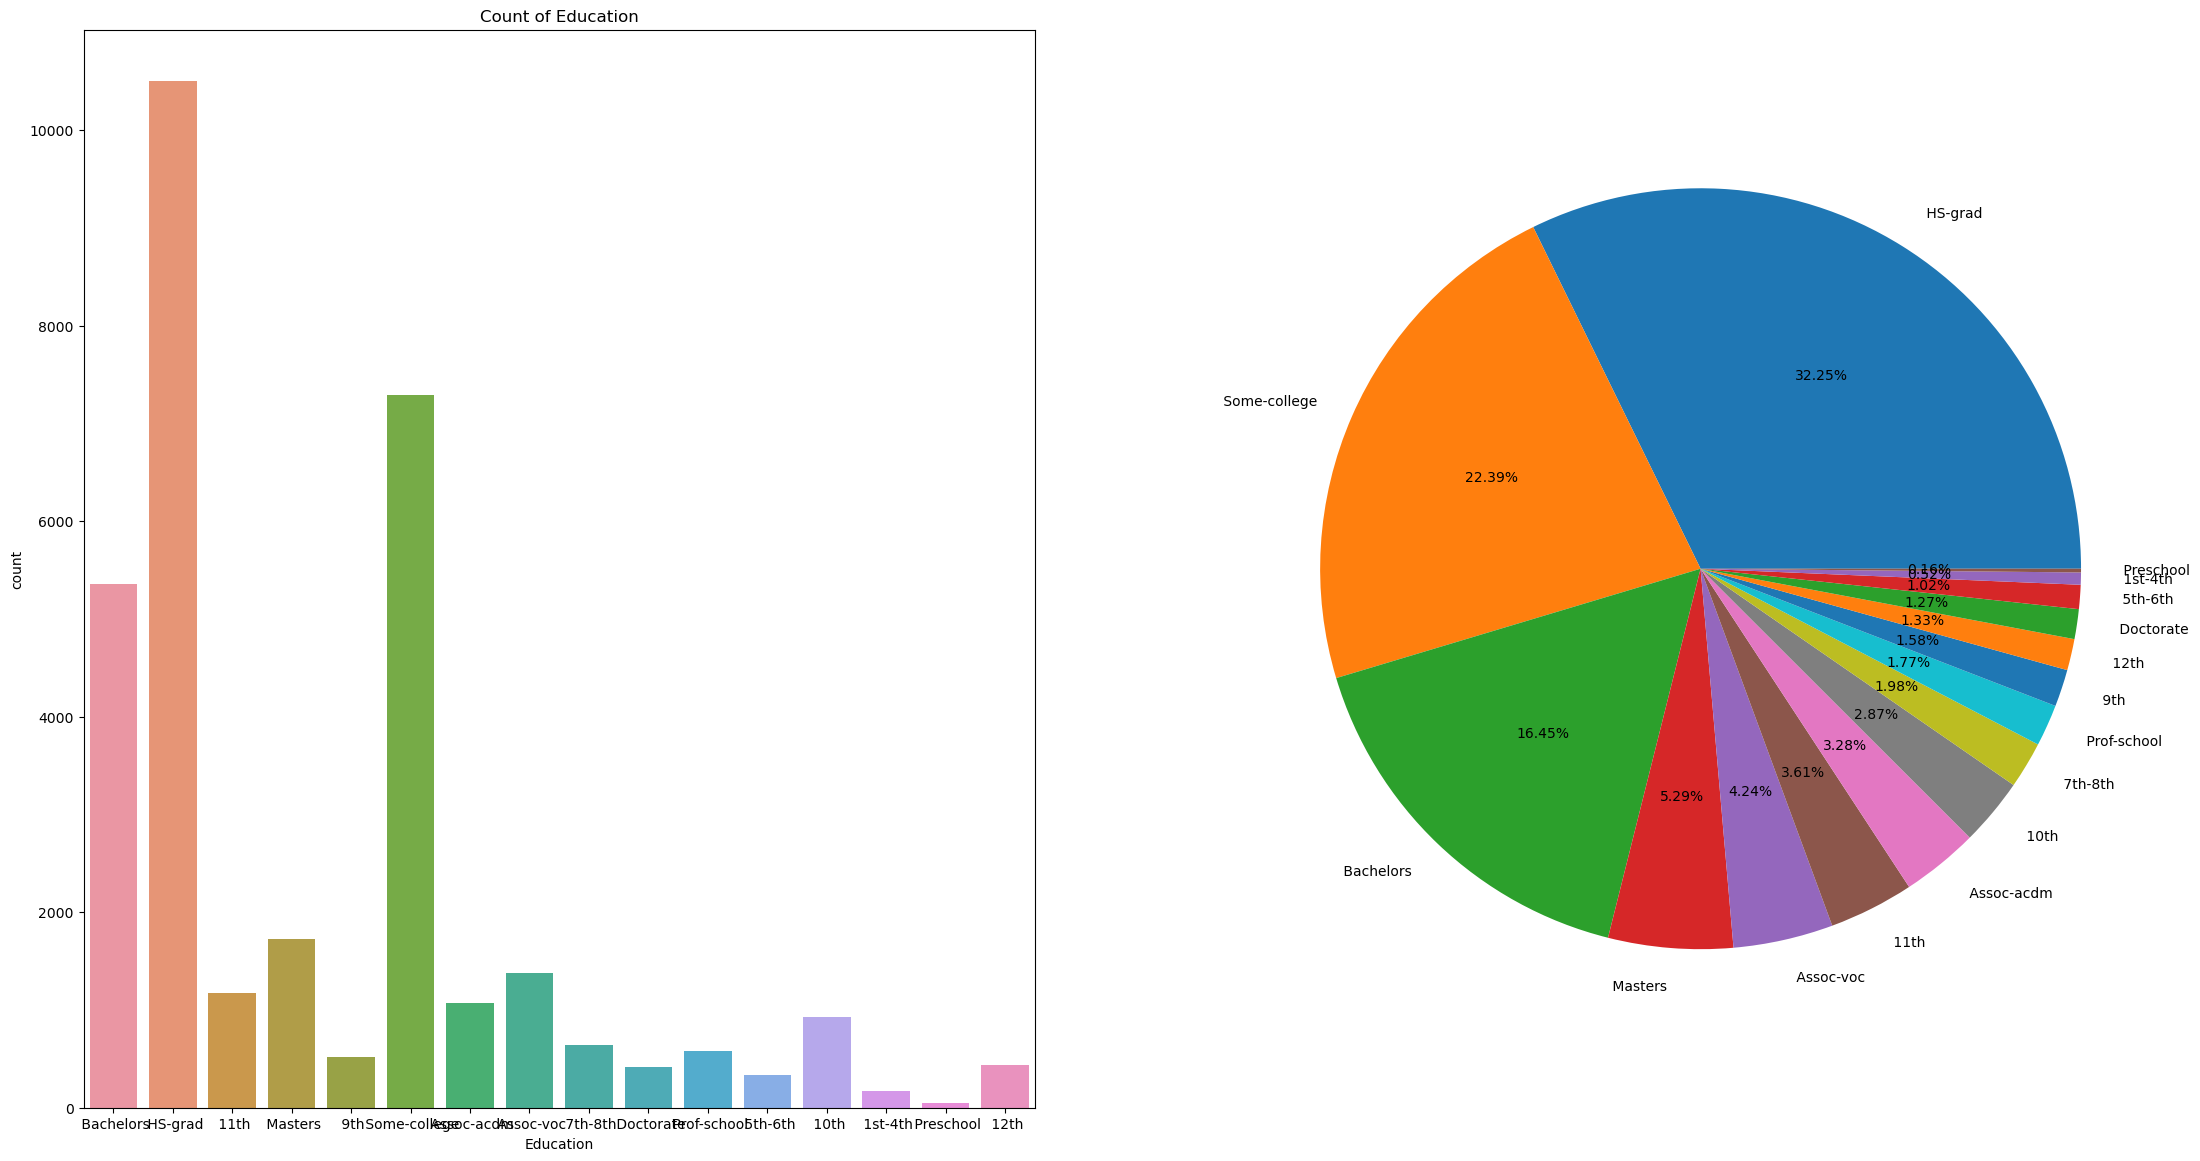

In [20]:
fig,ax = plt.subplots(1,2,figsize=(27,14))
ax[0].set_title("Count of Education")
percentage = df["Education"].value_counts()
labels = list(df["Education"].value_counts().index)

sns.countplot(x=df["Education"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


# ***Interpretation:  The dataset indicates that 32% of Hs grade and 22% of Some college

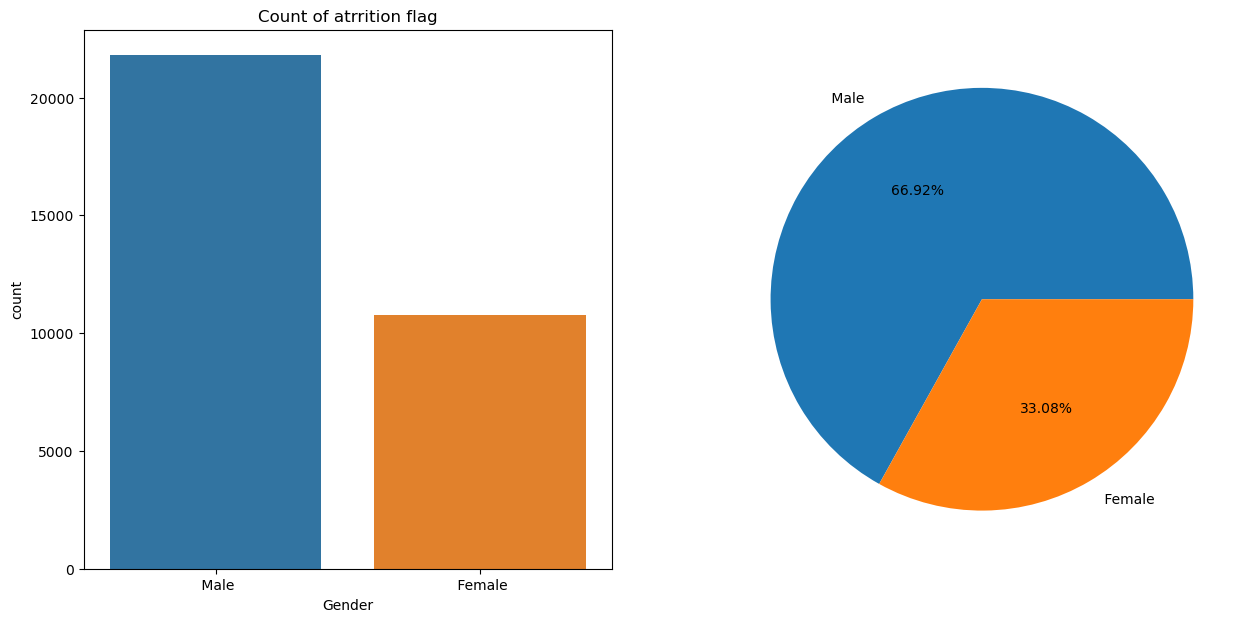

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of atrrition flag")
percentage = df["Gender"].value_counts()
labels = list(df["Gender"].value_counts().index)

sns.countplot(x=df["Gender"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


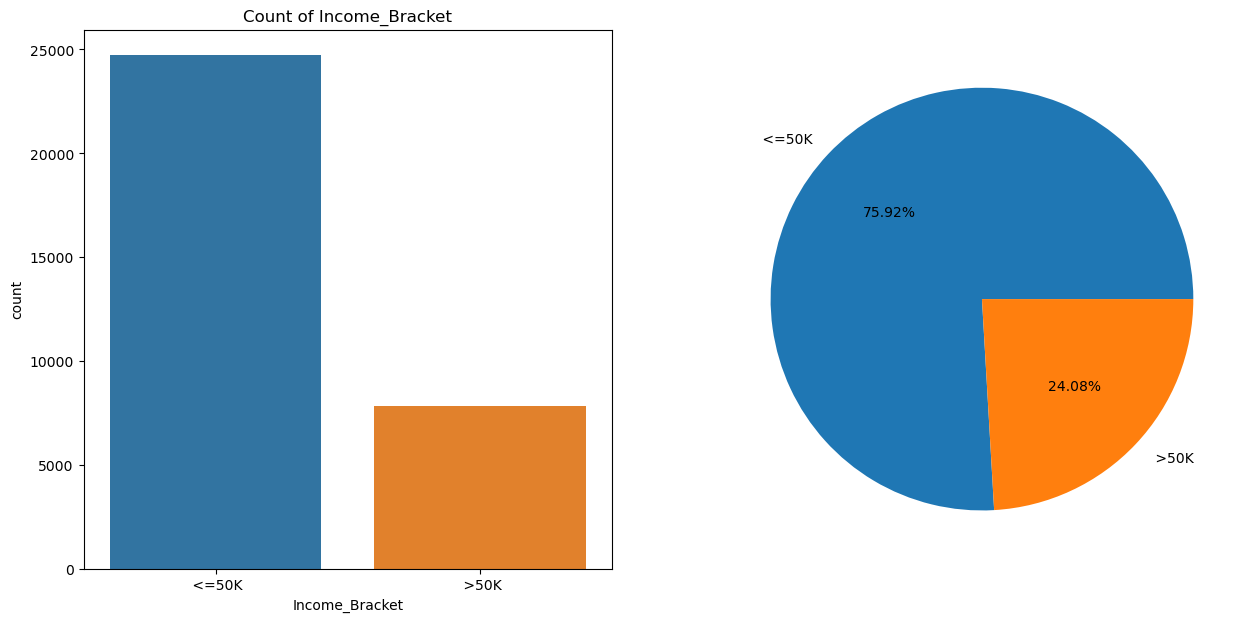

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Count of Income_Bracket")
percentage = df["Income_Bracket"].value_counts()
labels = list(df["Income_Bracket"].value_counts().index)

sns.countplot(x=df["Income_Bracket"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


#  ***Interpretation:  The dataset indicates that 75% of Income_Braket are  <=55K and 25% of >=50K.

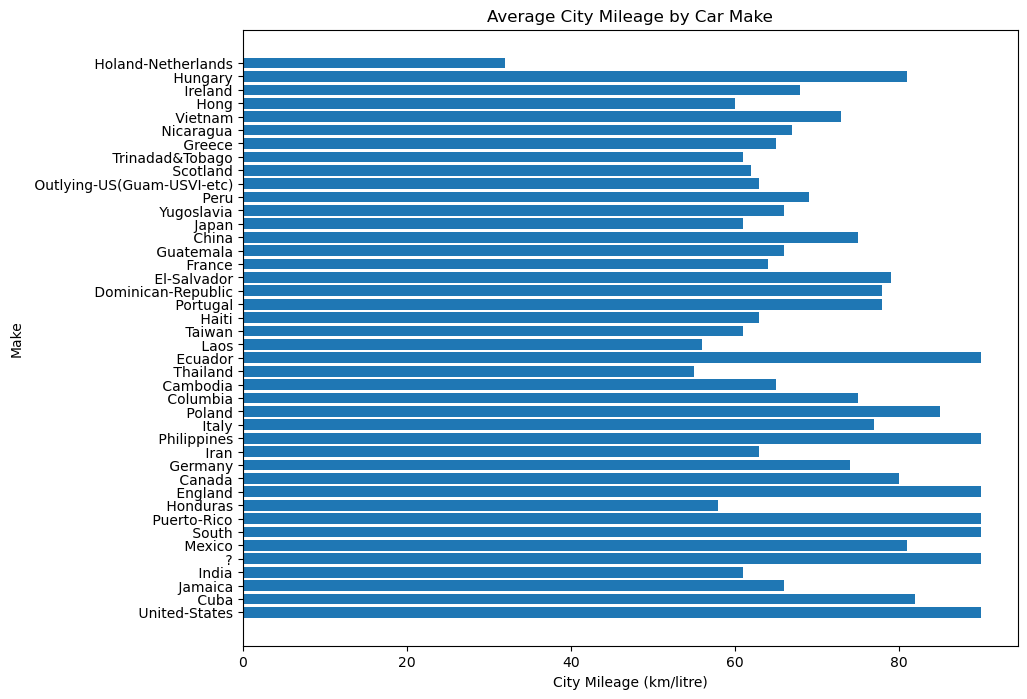

In [22]:
plt.figure(figsize=(10, 8))
plt.barh(df['Native_Country'], df['Age'])
plt.xlabel('City Mileage (km/litre)')
plt.ylabel('Make')
plt.title('Average City Mileage by Car Make')
plt.show()


# ***Interpretation:  The dataset indicates more city mileage for United_States,England,Philippines,Ecuador ets..are about 90+ mileage.

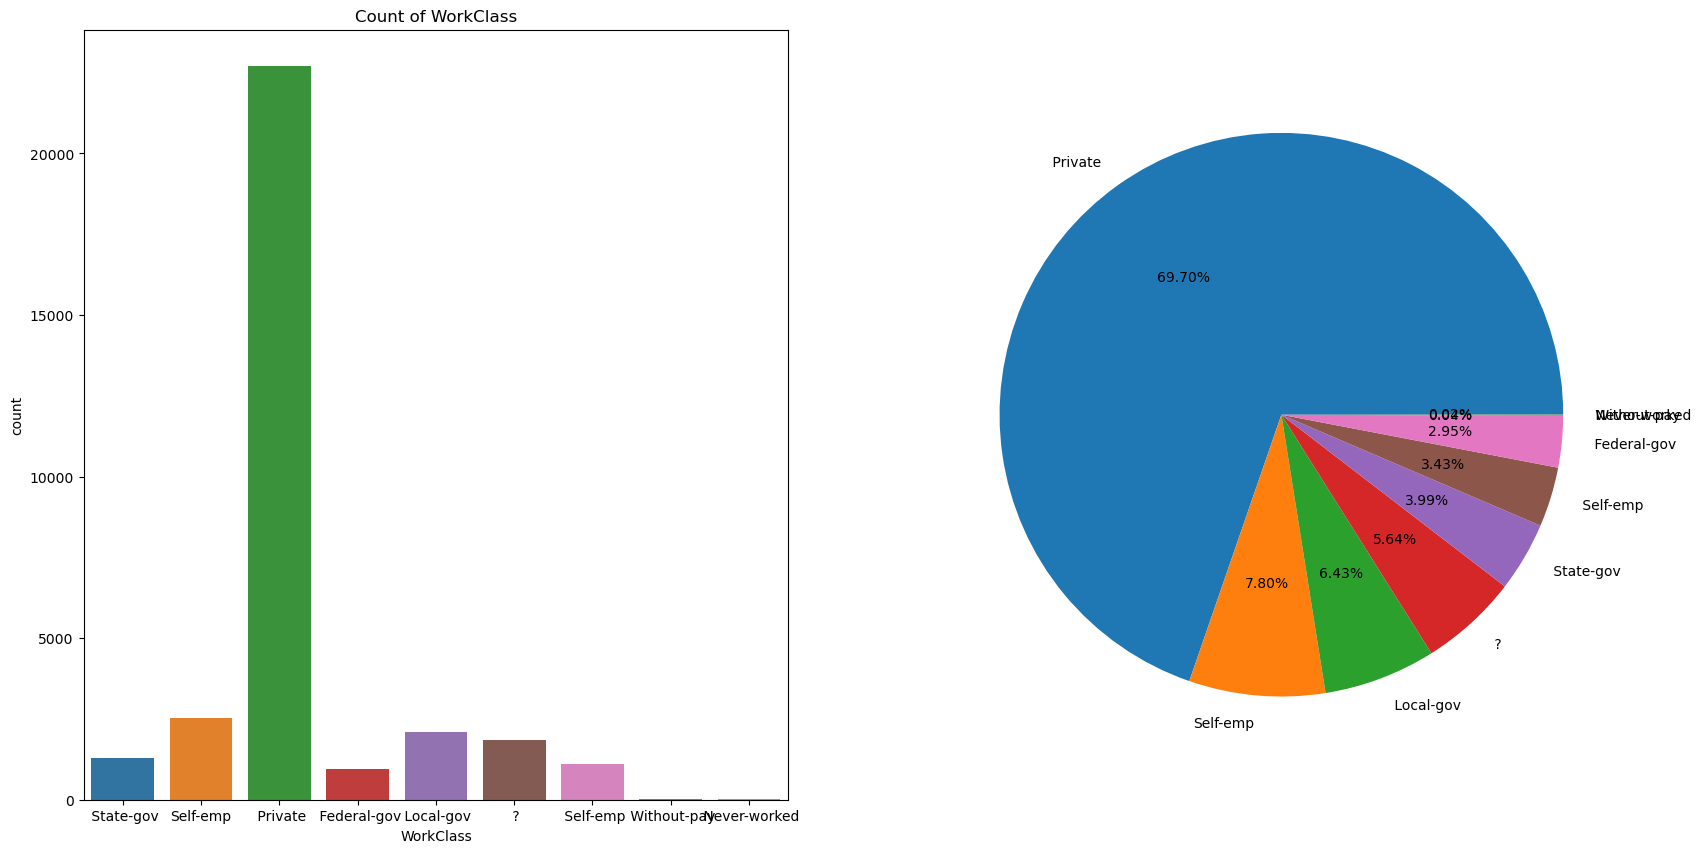

In [23]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].set_title("Count of WorkClass")
percentage = df["WorkClass"].value_counts()
labels = list(df["WorkClass"].value_counts().index)

sns.countplot(x=df["WorkClass"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


# ***Interpretation:  The dataset indicates that 70% of work_class are from Private.

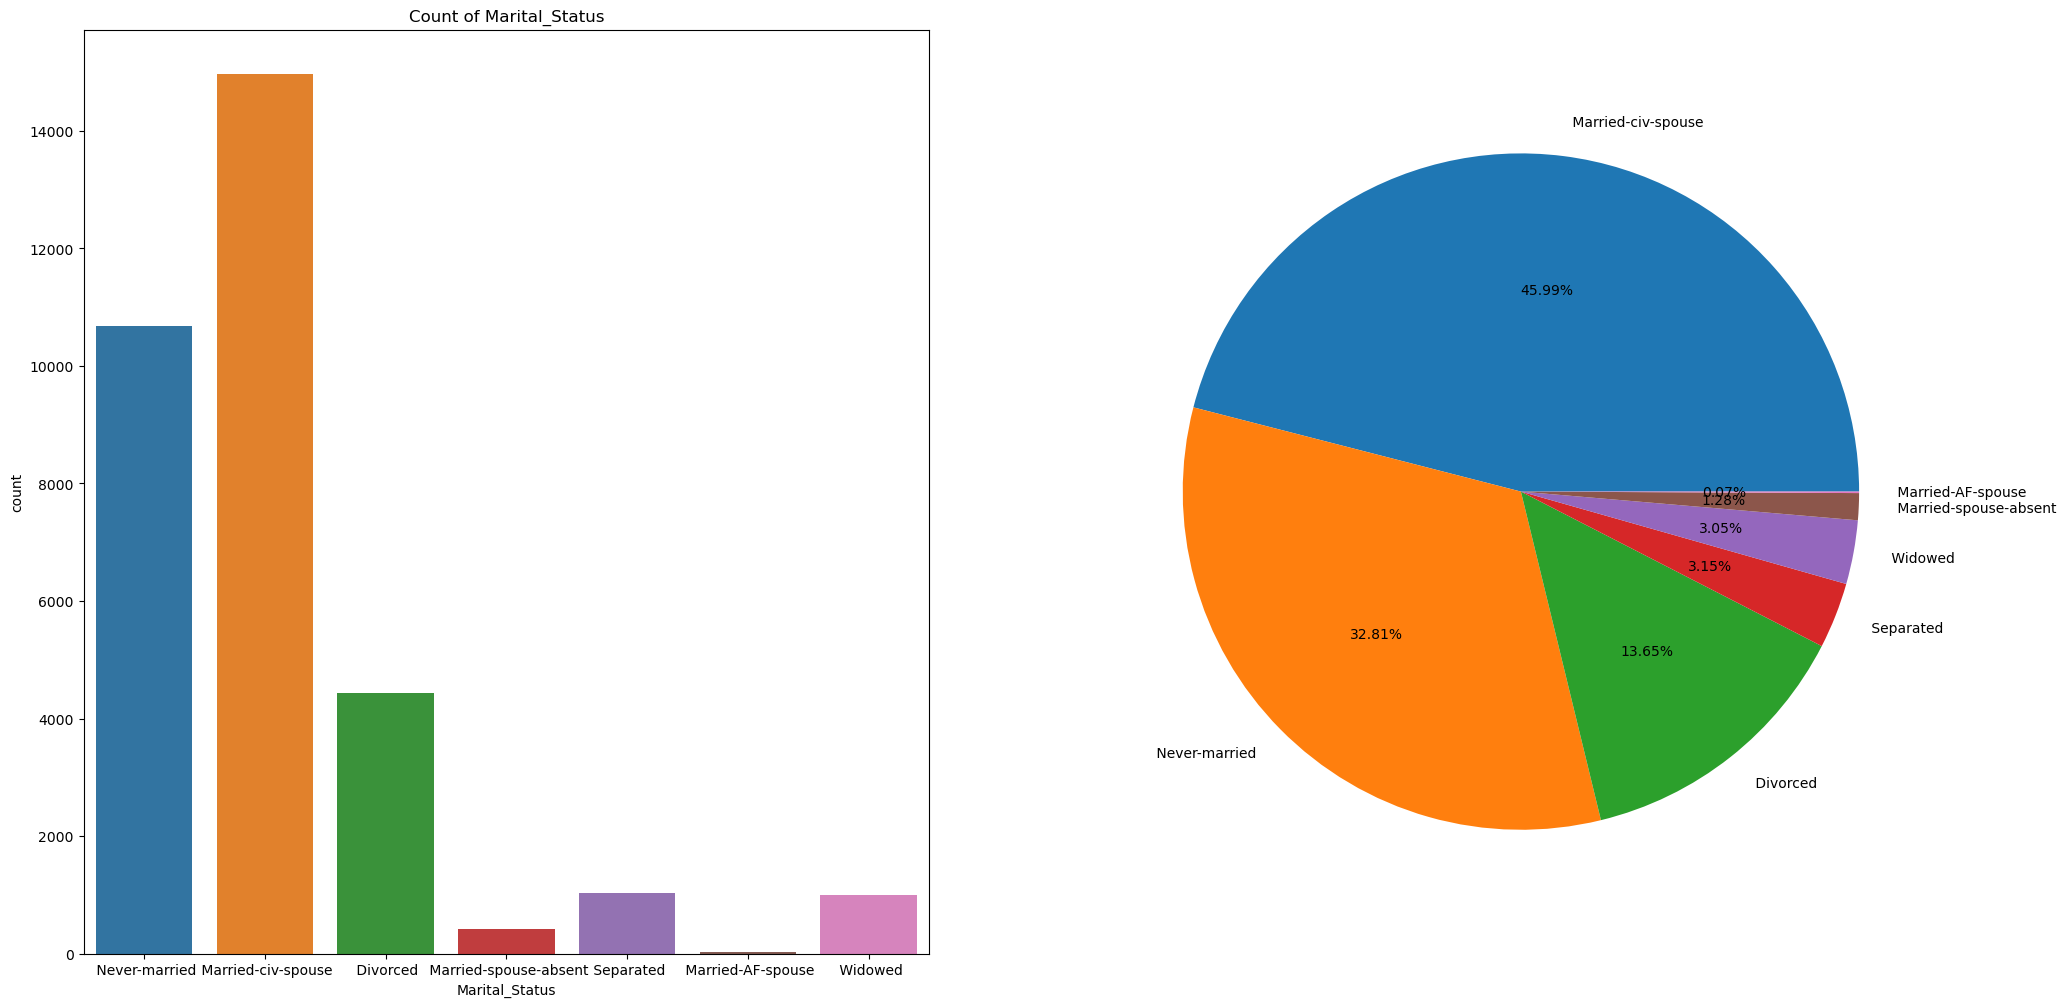

In [24]:
fig,ax = plt.subplots(1,2,figsize=(24,12))
ax[0].set_title("Count of Marital_Status")
percentage = df["Marital_Status"].value_counts()
labels = list(df["Marital_Status"].value_counts().index)

sns.countplot(x=df["Marital_Status"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


# ***Interpretation:  The dataset indicates that 45% of Martial_status are married -civ-spouse.

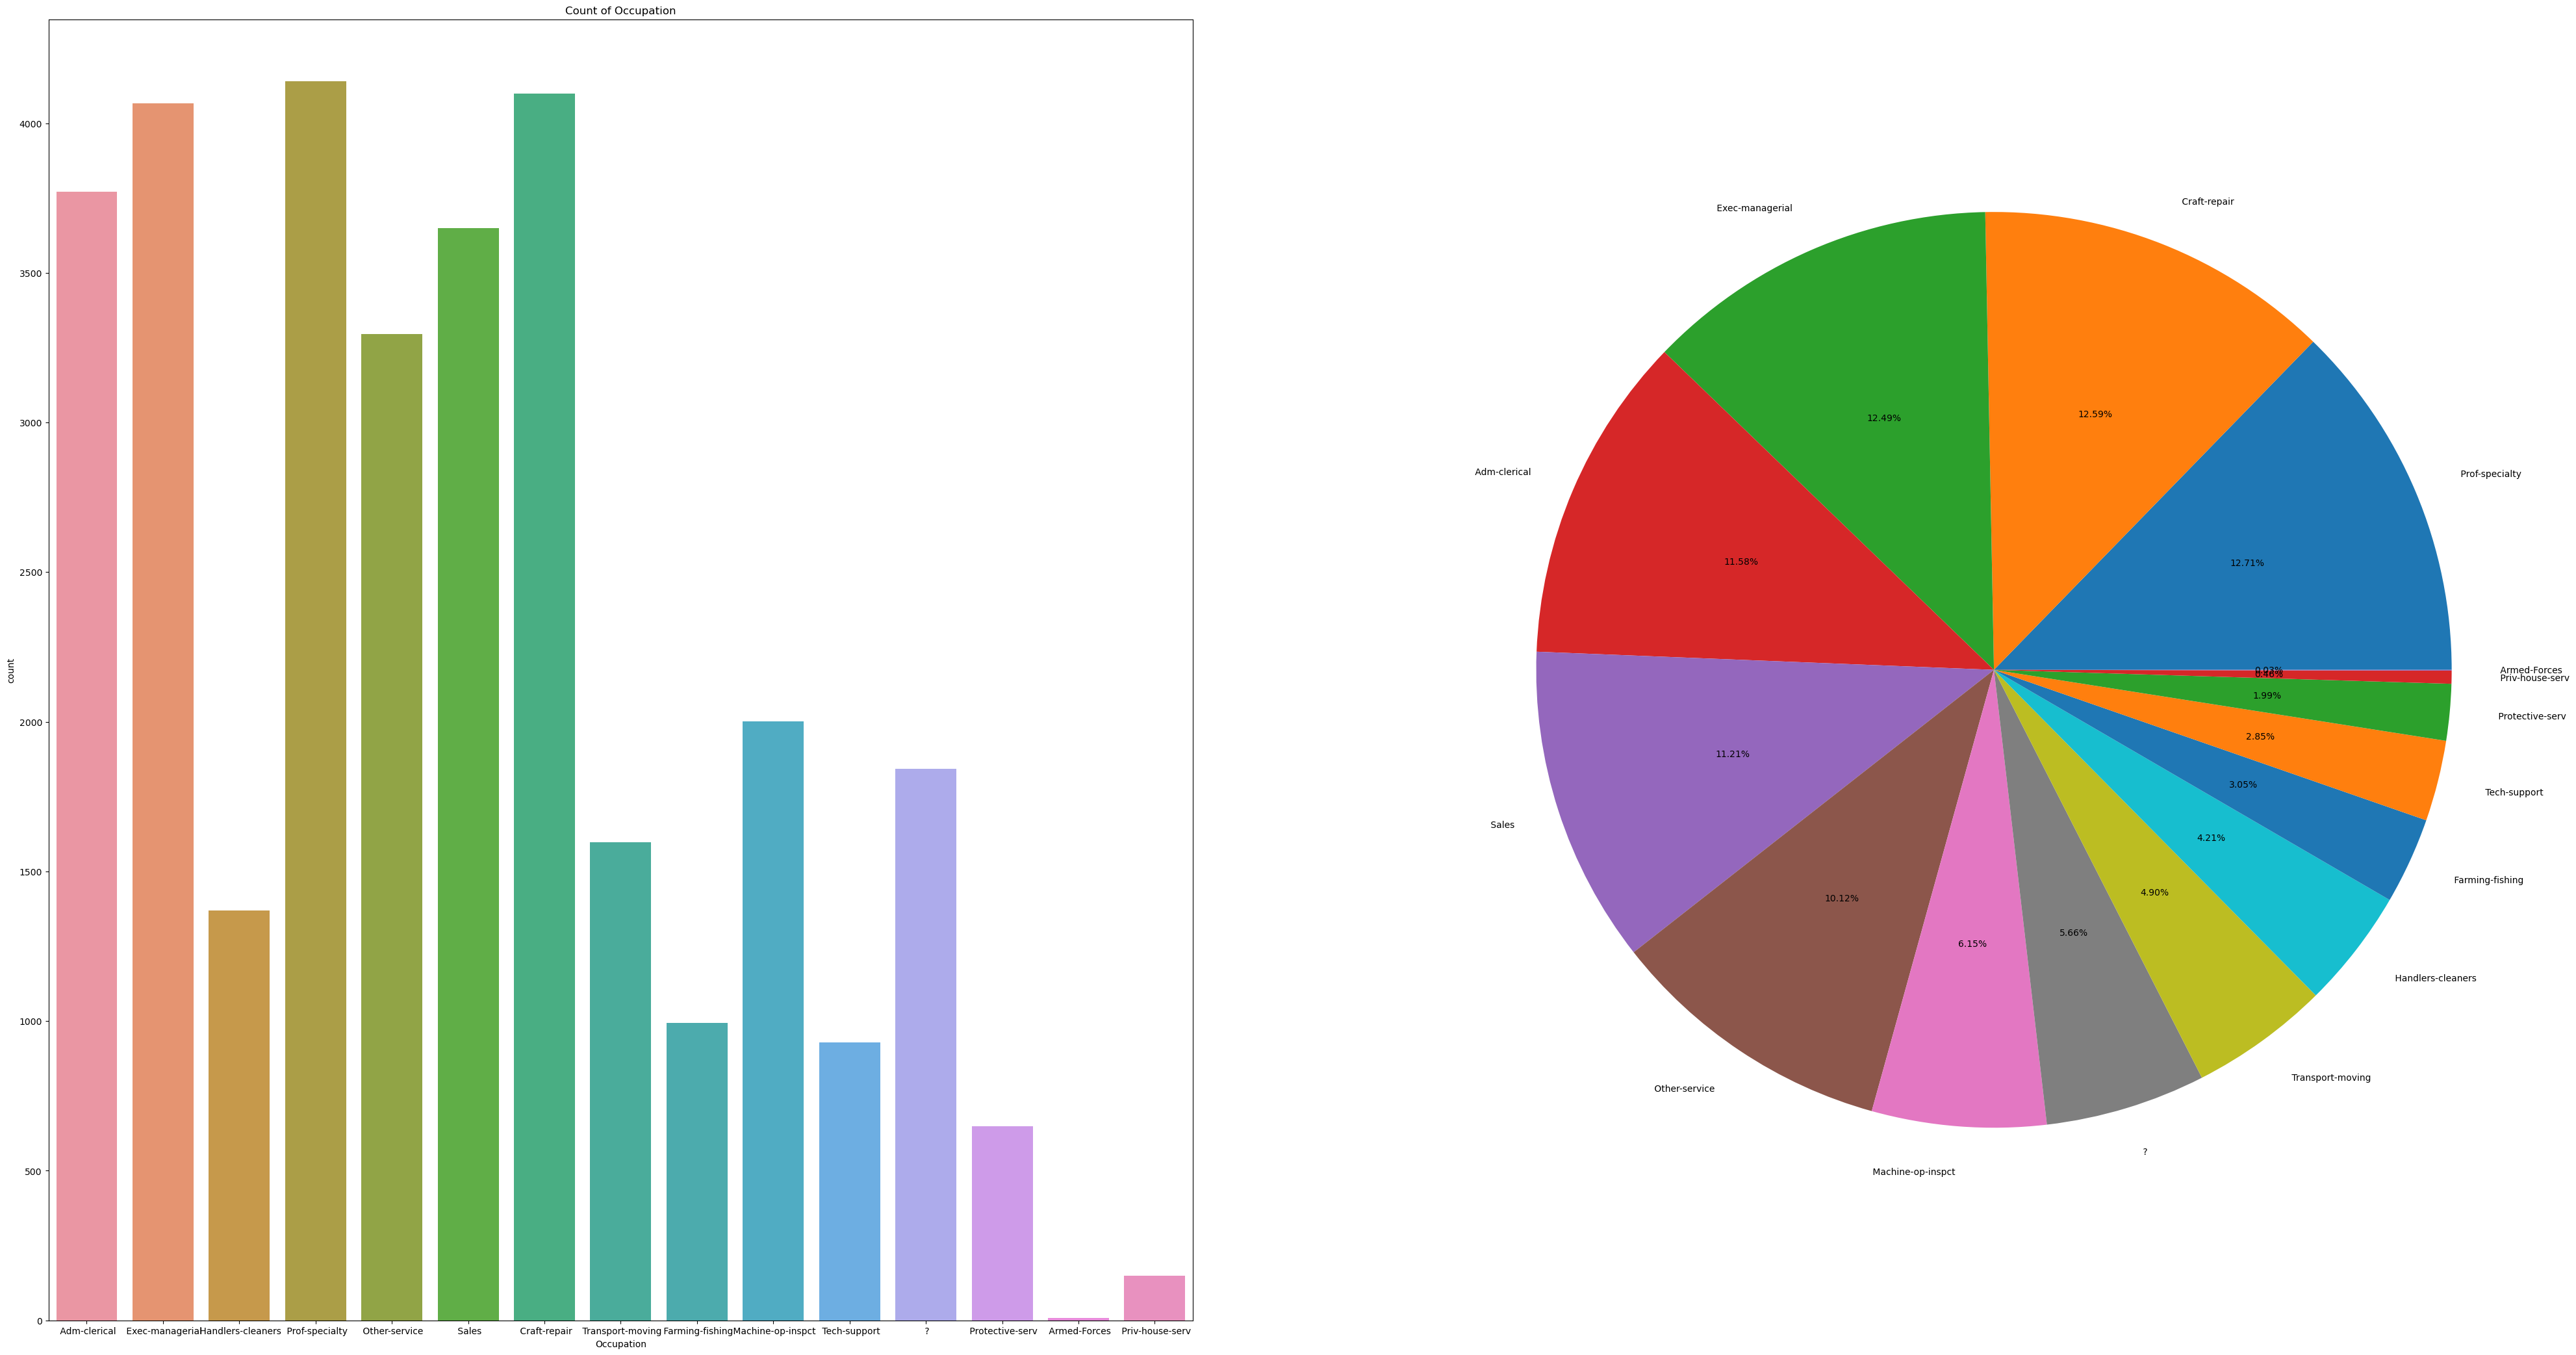

In [25]:
fig,ax = plt.subplots(1,2,figsize=(50,26))
ax[0].set_title("Count of Occupation")
percentage = df["Occupation"].value_counts()
labels = list(df["Occupation"].value_counts().index)

sns.countplot(x=df["Occupation"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


## Task 5 

In [26]:
def info_of_numeric(col):
    print(f"The mean of column {col} is {df[col].mean()}")
    print(f"The median of column {col} is {df[col].median()}")
    print(f"The mode of column {col} is {df[col].mode()[0]}")
    print(f"The std of column {col} is {df[col].std()}")
    print(f"Number of missing values in column {col} is {df[col].isnull().sum()}")

In [27]:
info_of_numeric("Age")

The mean of column Age is 38.58164675532078
The median of column Age is 37.0
The mode of column Age is 36
The std of column Age is 13.640432553581146
Number of missing values in column Age is 0


In [28]:
info_of_numeric("Education_Num")

The mean of column Education_Num is 10.0806793403151
The median of column Education_Num is 10.0
The mode of column Education_Num is 9
The std of column Education_Num is 2.5727203320673406
Number of missing values in column Education_Num is 0


In [29]:
info_of_numeric("Hours_Per_Week")

The mean of column Hours_Per_Week is 40.437455852092995
The median of column Hours_Per_Week is 40.0
The mode of column Hours_Per_Week is 40
The std of column Hours_Per_Week is 12.34742868173081
Number of missing values in column Hours_Per_Week is 0


Conclusion - 

## Task 6 

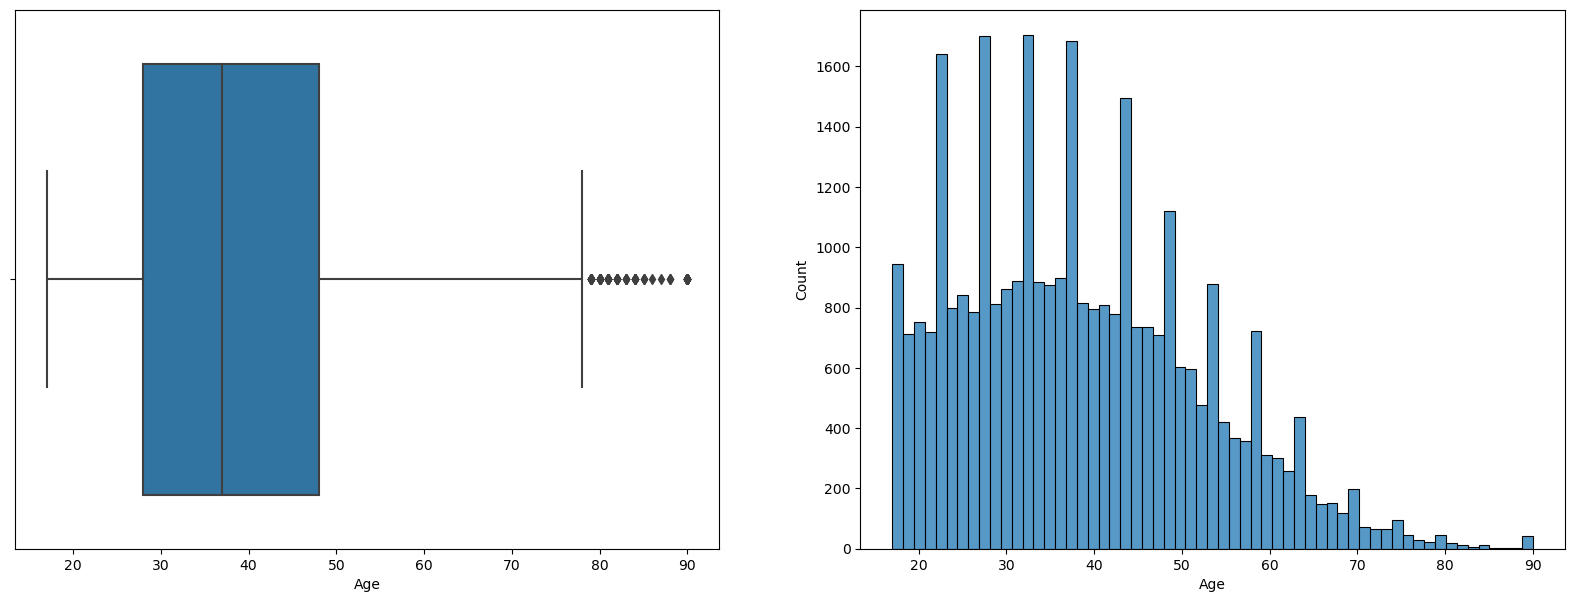

In [39]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["Age"],ax=ax[1])
sns.boxplot(x=df["Age"],ax=ax[0])
plt.show()

# ***Interpretation: Most likely, customer age follows normal distribution. Most of the  customers are in between 25 and 50 years of age.

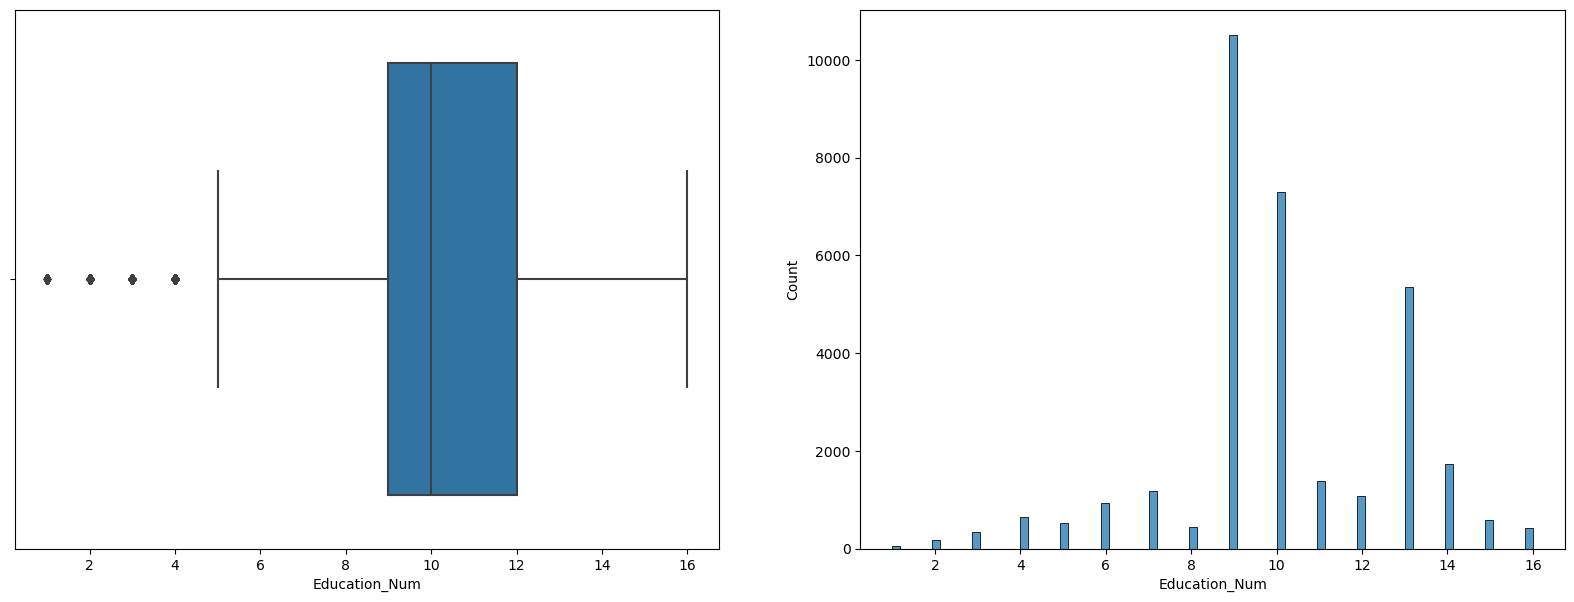

In [40]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["Education_Num"],ax=ax[1])
sns.boxplot(x=df["Education_Num"],ax=ax[0])
plt.show()

# ***Interpretation: Most likely, customer Education_num follows normal distribution. Most of the customers are in between 9 and 12.

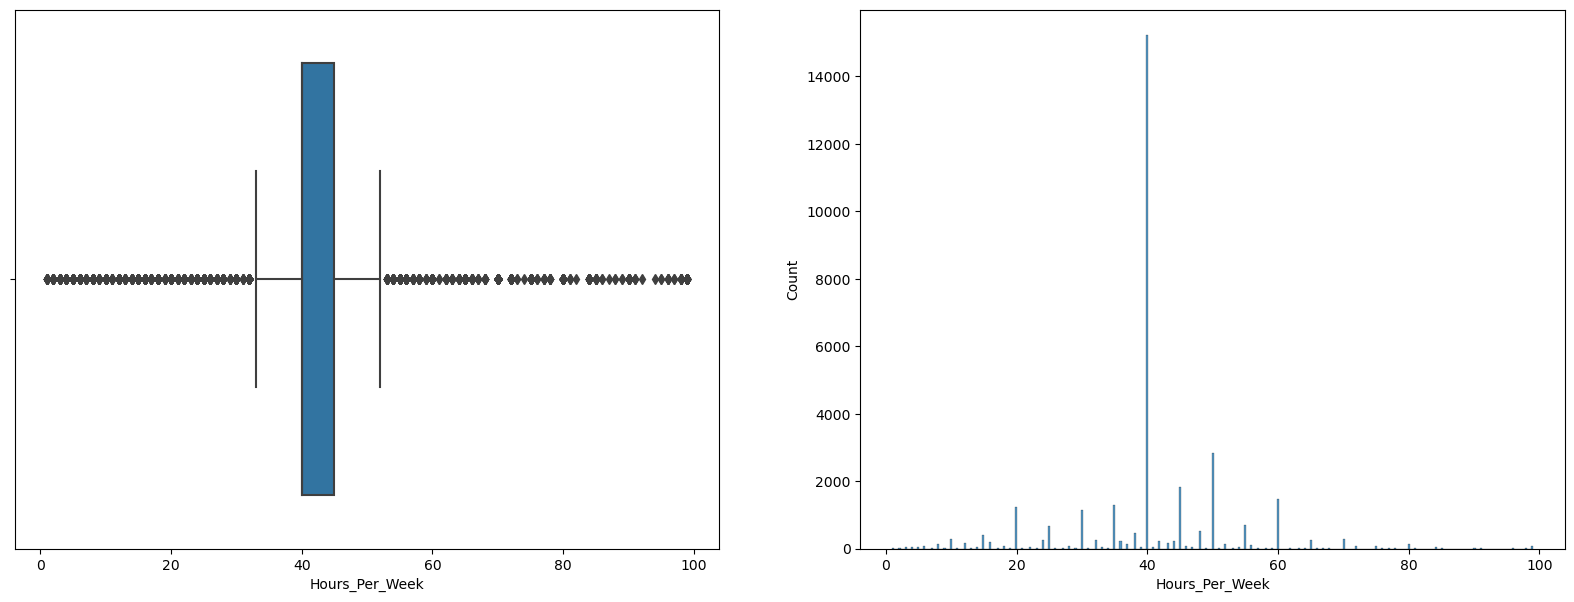

In [41]:
fig,ax= plt.subplots(1,2,figsize = (20,7))
sns.histplot(x=df["Hours_Per_Week"],ax=ax[1])
sns.boxplot(x=df["Hours_Per_Week"],ax=ax[0])
plt.show()

# ***Interpretation: Most likely, customer working hours per week follows normal distribution has hore outliners. Most of the bank customers are in between 40 and 50 .